# DATA CHALLENGE :   HOUSE  PRICE FORCASTING

## 1. DATA PREPROCESSING :

In [5]:
!python -m pip install -r requirements.txt

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Anass\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
filepath='data/'
X_train=pd.read_csv(filepath +'X_train_J01Z4CN.csv') 
Y_train=pd.read_csv(filepath + 'y_train_OXxrJt1.csv')
Y_test=pd.read_csv(filepath + 'y_random_MhJDhKK.csv')
X_test=pd.read_csv(filepath + 'X_test_BEhvxAN.csv')


In [7]:
X_train.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_test.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35160615,maison,49.371670,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,...,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35830639,propriété,49.037190,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,...,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36016657,appartement,47.097180,6.149253,ornans,25290,135.0,NaN,NaN,NaN,...,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,35759225,appartement,43.699670,7.245556,nice,6000,3637.0,3.0,NaN,210.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35252229,divers,43.849435,6.215461,moustiers-sainte-marie,4360,600.0,NaN,NaN,NaN,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train.describe()

,id_annonce,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
count,3.736800e+04,37368.000000,37368.000000,37368.000000,36856.000000,9743.000000,1.558100e+04,19068.000000,18530.000000,35802.000000,...,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000
mean,3.569033e+07,46.546155,2.619087,53598.371655,1088.831615,3.479524,3.995665e+03,205.385148,31.845548,4.245405,...,0.293486,0.179699,7.979153,0.148282,0.309596,0.200145,0.053870,0.039847,0.003827,0.000241
std,1.468073e+06,2.356581,2.597060,28807.220527,5555.320867,6.725577,5.441595e+04,790.501769,310.576209,2.987782,...,0.455365,0.383942,4.646145,0.355384,0.462333,0.400114,0.225763,0.195602,0.061744,0.015518
min,6.774630e+06,41.374436,-4.733545,1000.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.580825e+07,43.921547,1.096014,30150.000000,74.000000,1.000000,3.620000e+02,125.000000,8.000000,3.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.587096e+07,46.939440,2.380793,59000.000000,115.000000,2.000000,7.950000e+02,180.000000,16.000000,4.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.601119e+07,48.841511,4.624248,78210.000000,235.250000,4.000000,1.841000e+03,239.000000,36.000000,5.000000,...,1.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.609881e+07,51.075892,9.503198,95880.000000,411311.000000,55.000000,6.203700e+06,100000.000000,17024.000000,130.000000,...,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
L=["property_type","city","energy_performance_category","ghg_category","exposition"]
for x in L:
    X_train[x]=X_train[x].astype("category")
    X_test[x]=X_test[x].astype("category")


In [11]:
X_train.isnull()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
37364,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
37365,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
37366,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

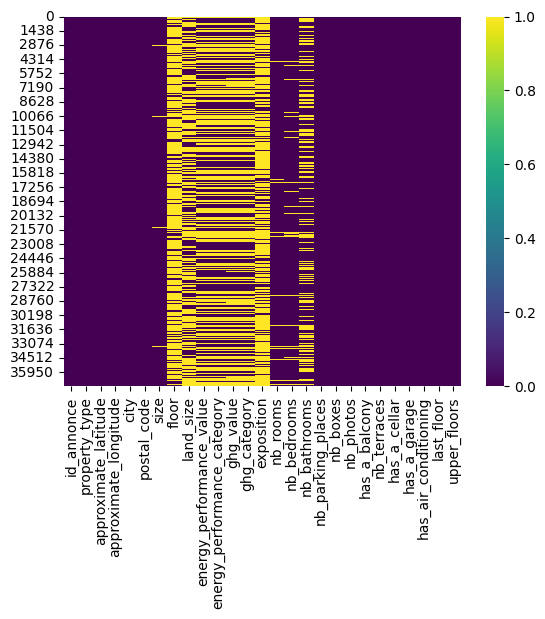

In [14]:
sb.heatmap(X_train.isnull(),cmap='viridis')

In [17]:
X_train['energy_performance_category']

0        NaN
1          D
2        NaN
3          D
4        NaN
        ... 
37363      E
37364      D
37365    NaN
37366    NaN
37367    NaN
Name: energy_performance_category, Length: 37368, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']